In [74]:


import matplotlib.pyplot as plt
%matplotlib inline

import math
import numpy as np


import predict

525600
525600


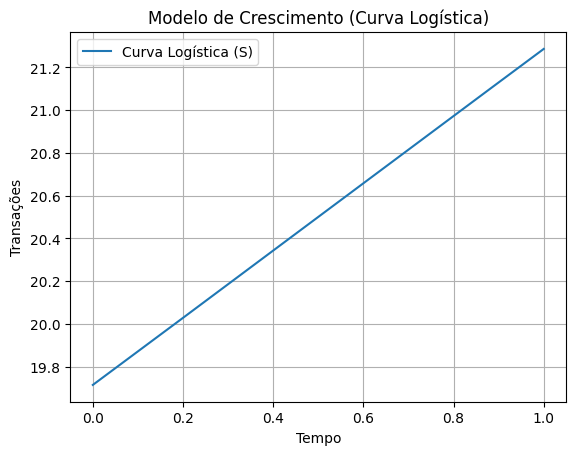

In [75]:
def logistic_curve(t, P0, K, r, t0):
    return P0 + (K - P0) / (1 + np.exp(-r * (t - t0)))

# Dados de exemplo de tempo (t)
A = 1
seconds = A * 365 * 24 *60 #* 60 #(d x h x m x s) <<<<<<<<<<<<<<< precisa descomentar para ter todos os pontos
print(seconds)
t = np.linspace(0, A , seconds)
print(len(t))

# Parâmetros da curva logística
P0 = 10  # População inicial
K = 31  # Valor máximo da população
r = 0.3   # Taxa de crescimento
t0 = 0.5    # Ponto de inflexão

# Calcula a população usando a função da curva logística
rate_limit_transacoes_por_segundo = logistic_curve(t, P0, K, r, t0)

# Plotagem da curva logística
plt.plot(t, rate_limit_transacoes_por_segundo, label='Curva Logística (S)')
plt.xlabel('Tempo')
plt.ylabel('Transações')
plt.title('Modelo de Crescimento (Curva Logística)')
plt.legend()
plt.grid(True)
plt.show()


Exemplo de vetorização

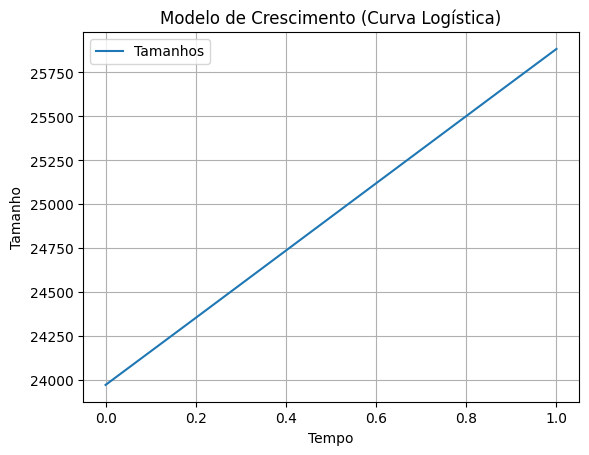

In [76]:
blockchain_predict = predict.blockchain_predict()

 
sum_size_tps = rate_limit_transacoes_por_segundo * blockchain_predict.transation_size
plt.plot(t, sum_size_tps, label='Tamanhos')
plt.xlabel('Tempo')
plt.ylabel('Tamanho')
plt.title('Modelo de Crescimento (Curva Logística)')
plt.legend()
plt.grid(True)
plt.show()


In [82]:
def cumulative_sum_positions_below_threshold(array, threshold):
    cum_sum = np.cumsum(array)
    below_threshold_indices = np.where(cum_sum < threshold)[0]
    return below_threshold_indices

def remove_values_below_threshold(array, positions_below_threshold):
    print(f'{array}, {positions_below_threshold}')
    return np.delete(array, positions_below_threshold)

sum_size_tps_analisys = np.copy(sum_size_tps)
graph_aggregate_transations_block = np.array([])

messages_transacoes_por_segundo = np.copy(rate_limit_transacoes_por_segundo)

blockchain = np.empty((0, 3), dtype=object) #num_bloco, quant_transações, tempo_decorrido

while(len(sum_size_tps_analisys) > 0): 

    #procurando transações para formar um bloco (tshoold max tamanho do bloco)
    aggregate_transations_block = cumulative_sum_positions_below_threshold(sum_size_tps_analisys, blockchain_predict.absolute_max_bytes)
    #soma dos tamanhos das transações < que deve ser menor que o absolute_max_bytes dado acima
    cumulative_sum_transations_size_in_block = np.cumsum(sum_size_tps_analisys[aggregate_transations_block])[-1]#last element

    #temos que saber se a quantidade de mensagens permitidos é suficiente
    total_messages_block = cumulative_sum_positions_below_threshold(messages_transacoes_por_segundo, blockchain_predict.max_message_count)
    cumulative_sum_messages_in_block = np.cumsum(messages_transacoes_por_segundo[total_messages_block])[-1]#last element

    seconds_if_max_bytes = len(aggregate_transations_block)
    seconds_if_max_messages = len(total_messages_block)

    remove_transations = np.empty(0)
    if seconds_if_max_bytes >= blockchain_predict.batch_timeout \
        and seconds_if_max_messages >= blockchain_predict.batch_timeout:
        #codigo para batch timeout
        remove_transations = np.arange(blockchain_predict.batch_timeout)
        pass

    elif seconds_if_max_bytes <= seconds_if_max_messages: #Caso atingir primeiro o maximo de bytes
        remove_transations = np.copy(aggregate_transations_block)
        pass

    elif seconds_if_max_bytes > seconds_if_max_messages: #Caso atingir primeiro o maximo de mensagens
        remove_transations = np.copy(total_messages_block)
        pass



    #print(f'cumulative_sum_messages_in_block {cumulative_sum_messages_in_block}, blockchain_predict.max_message_count {blockchain_predict.max_message_count}')
    #print(f'time bytes {len(aggregate_transations_block)}s, time messages {len(total_messages_block)}s')

    
    sum_size_tps_analisys = remove_values_below_threshold(sum_size_tps_analisys, remove_transations) # Remover transações analisadas do loop
    messages_transacoes_por_segundo = remove_values_below_threshold(messages_transacoes_por_segundo, remove_transations) # Remover transações analisadas do loop

    #print('Time elapsed until new block', len(aggregate_transations_block))    
    time_elapsed_new_block = len(aggregate_transations_block) # cada posição é um segundo de transações
    graph_aggregate_transations_block = np.append(graph_aggregate_transations_block, time_elapsed_new_block)



[23972.1914693  23972.19509272 23972.19871615 ... 25883.80128385
 25883.80490728 25883.8085307 ], [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 2

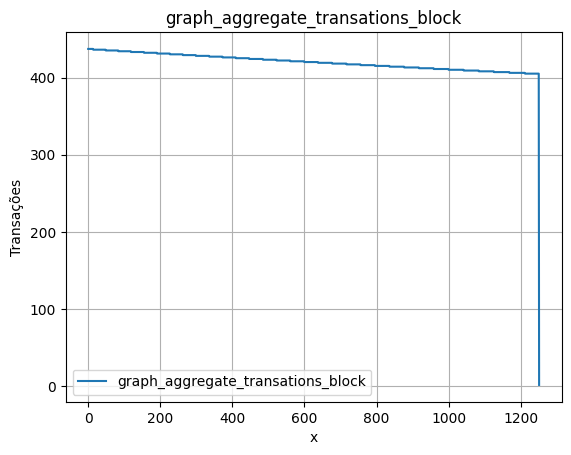

In [ ]:
# Plotagem da quantidade de transações agrupadas por bloco
x = np.arange(0, len(graph_aggregate_transations_block))

plt.plot(x, graph_aggregate_transations_block, label='graph_aggregate_transations_block')
plt.xlabel('x')
plt.ylabel('Tempo decorrido para um novo bloco')
plt.title('graph_aggregate_transations_block')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

def cumulative_sum_with_flag(array, threshold):
    cum_sum = np.cumsum(array)
    flag = np.zeros_like(cum_sum, dtype=bool)
    flag[cum_sum >= threshold] = True
    cum_sum[flag] = 0
    return cum_sum

# Exemplo de uso
array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
threshold = 10
result = cumulative_sum_with_flag(array, threshold)
print(result)



[1 3 6 0 0 0 0 0 0 0]


In [80]:
import numpy as np

# Função predict
def predict(x):
    return 2 * x + 1

# Vetor de entrada
v = np.array([0, 1, 2, 3, 4])

# Aplicar a função predict a todos os elementos de v de uma vez
resultado = predict(v)

print(resultado)

resultado1 = np.delete(v,v)
print(resultado1)

[1 3 5 7 9]
[]


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
import numpy as np

# Criando um np.array de objetos
array_de_objetos = np.array([["Alice", 30, "F"],
                             ["Bob", 25, "M"],
                             ["Charlie", 35, "M"]], dtype=object)

# Exibindo o array
print("Array de objetos:")
print(array_de_objetos)

# Acessando elementos do array
print("\nAcessando elementos do array:")
print("Nome:", array_de_objetos[0][0])
print("Idade:", array_de_objetos[0][1])
print("Sexo:", array_de_objetos[0][2])


Array de objetos:
[['Alice' 30 'F']
 ['Bob' 25 'M']
 ['Charlie' 35 'M']]

Acessando elementos do array:
Nome: Alice
Idade: 30
Sexo: F
